***TODO:*** POO the code 

```java
# class files :
    fcts . . .
```



In [4]:
file_id="1qAD7StpMovQM2u8g6kgf9CysYs-vZ-P-"
!gdown https://drive.google.com/uc?id={file_id}
!unzip -q datasetProjetS5_2020.zip
%rm -r "/content/datasetProjetS5_2020/train/Background_without_leaves"
%rm -r "/content/datasetProjetS5_2020/test/Background_without_leaves"
%rm -r "/content/datasetProjetS5_2020/valid/Background_without_leaves"

Downloading...
From: https://drive.google.com/uc?id=1qAD7StpMovQM2u8g6kgf9CysYs-vZ-P-
To: /content/datasetProjetS5_2020.zip
864MB [00:05, 168MB/s]
replace datasetProjetS5_2020/test/Apple___Apple_scab/image (504).JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
pip install opencv-python==4.4.0.40 opencv-contrib-python==4.4.0.40

In [6]:
import os
import cv2
from keras.preprocessing.image import img_to_array
from os import listdir
from matplotlib import pyplot as plt
import numpy as np

#https://www.kaggle.com/emmarex/plant-disease-detection-using-keras

In [8]:
root_dir="./datasetProjetS5_2020"
train_dir=os.path.join(root_dir,'train')
test_dir=os.path.join(root_dir,'test')
directory_root = './datasetProjetS5_2020'

# **TRAINING**

In [9]:
image_list, label_list = [], []
i=0
classes=[]
pathes=[]
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
   
    plant_folder ="train"
    plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
    #train folder ^
    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        classes.append(plant_disease_folder)
        plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
        # if plant_disease_folder == "Background_without_leaves" :
        #         plant_disease_image_list.remove("Background_without_leaves")
        #         print("yes")
        for image in plant_disease_image_list[:200]:
            image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(cv2.imread(str(image_directory),cv2.IMREAD_GRAYSCALE))
                label_list.append(plant_disease_folder)
                pathes.append(str(image_directory)) 
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")


[INFO] Loading images ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Squash___Powdery_mildew ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Pepper,_bell___Bacterial_spot ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Raspberry___healthy ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Cherry___Powdery_mildew ...
[INFO] Processing Corn___Northern_Leaf_Blight ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Apple___Black_rot ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Grape___healthy ...
[INFO] Processi

7460


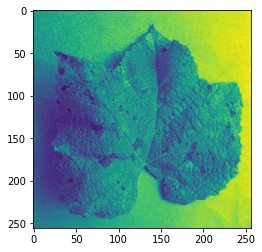

In [ ]:
#for img in image_list:
imgplot = plt.imshow(image_list[1426])
print(len(image_list))

**DETECTING FEATURES**


In [ ]:
features=[]
sift=cv2.SIFT_create()
for img in (image_list):
    kp , ft = sift.detectAndCompute(img,None)
    features.append(ft)
print(features)

In [ ]:

sift=cv2.SIFT_create()
dictionary_train=[]
i=0
noneTargets=[]

for p in pathes:
  try:
    BOW = cv2.BOWKMeansTrainer(1)
    image = cv2.imread(p)
    gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)
    kp, dsc= sift.detectAndCompute(gray,mask=None)
    #print(dsc)
    print("i",i)
    #if (dsc is not None):
    BOW.add(dsc)
    dicto_train=BOW.cluster()
    if len(dicto_train[0])==128:
      dictionary_train.append(dicto_train)
    #else:
      #noneTargets.append(i)
    i+=1
  except Exception as ex:
    print("error",ex)
#dictionary created


# **TESTING**

In [12]:
image_list_test, label_list_test ,pathes_test,classes_test=[], [], [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
   
    plant_folder ="test"
    plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
    #train folder ^
    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        classes_test.append(plant_disease_folder)
        plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
        # if plant_disease_folder == "Background_without_leaves" :
        #         plant_disease_image_list.remove("Background_without_leaves")
        #         print("yes")
        for image in plant_disease_image_list[:200]:
            image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list_test.append(cv2.imread(str(image_directory),cv2.IMREAD_GRAYSCALE))
                pathes_test.append(str(image_directory))
                label_list_test.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")
######################################################


[INFO] Loading images ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Squash___Powdery_mildew ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Pepper,_bell___Bacterial_spot ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Raspberry___healthy ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Cherry___Powdery_mildew ...
[INFO] Processing Corn___Northern_Leaf_Blight ...
[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Apple___Black_rot ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Grape___healthy ...
[INFO] Processi

NameError: ignored

In [26]:
i=0
dictionary_test=[]
for p in pathes_test:
  try:
    BOW_test = cv2.BOWKMeansTrainer(1)
    image = cv2.imread(p)
    gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)
    kp_test, dsc_test= sift.detectAndCompute(gray,mask=None)
    #here i am
    #print(dsc_test)
    #if (dsc_test is not None):
    #if (i not in noneTargets ):
    BOW_test.add(dsc_test)
    dicto_test=BOW_test.cluster()
    if len(dicto_test[0]==128):
      dictionary_test.append(dicto_test)
    i+=1
  except Exception as ex:
    print("error at", i,":",ex)
#dictionary created
  


In [ ]:
noneTargets

[6878, 6900, 6903]

In [ ]:
del label_list[6878]
del label_list[6900]
del label_list[6903]

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [14]:
print(len(dictionary_train))
print(len(dictionary_test))
print(len(image_list))
print(len(image_list_test))
print(len(label_list))
print("pathestest=",len(pathes_test))
print("pathes=",len(pathes))
#dictionary_train

7459
6396
7460
6396
7460
pathestest= 6396
pathes= 7460


# **PREDICTION**

In [ ]:
s=0
for i in range(len(classes_test)):
  if y_pred[i]==classes_test[i]:
    s+=1
print(i/len(classes_test))
print(i)

0.9736842105263158
37


In [ ]:
print(len(nv_dictionary))
print(len(label_list_test))

6396
6396


In [34]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn import neighbors
from sklearn import svm
nv_array=np.array(dictionary_train).reshape(len(dictionary_train),128)
classifier = svm.SVC(kernel='rbf', gamma='scale')
classifier.fit(nv_array,label_list[:-2])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:

s=classifier.score(nv_array,label_list[:-2])

print(y_pred)
print(classes_test)
print("score",s*100)

['Pepper,_bell___healthy' 'Peach___healthy' 'Peach___healthy' ...
 'Strawberry___healthy' 'Strawberry___healthy'
 'Pepper,_bell___Bacterial_spot']
['Peach___healthy', 'Strawberry___Leaf_scorch', 'Apple___Apple_scab', 'Squash___Powdery_mildew', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Leaf_Mold', 'Potato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Pepper,_bell___Bacterial_spot', 'Apple___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Raspberry___healthy', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Corn___Northern_Leaf_Blight', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Apple___Black_rot', 'Grape___Black_rot', 'Grape___healthy', 'Corn___Common_rust', 'Cherry___healthy', 'Corn___healthy', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Soybean___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Potato___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot

In [ ]:
def plotDiagram(data,title):
  # define window size, output and axes
  fig, ax = plt.subplots(figsize=[8,6])

  # set plot title
  ax.set_title(title)

  # set x-axis name
  ax.set_xlabel("Features")

  # set y-axis name
  ax.set_ylabel("Effective")

  # create histogram within output
  N, bins, patches = ax.hist(data, bins=50, color="#ff0000") #initial color of all bins

  # Iterate through all histogram elements
  # each element in this interation is one patch on the histogram, where:
  # - bin_size - number of records in current bin
  # - bin - value of current bin (x-axis)
  # - patch - a rectangle, object of class matplotlib.patches.Patch
  # more details on patch properties: [visit this link][1]
  # for bin_size, bin, patch in zip(N, bins, patches):
  #     if bin_size == 56:
  #         patch.set_facecolor("<some color like #FF000>")
  #         patch.set_label("something")
  plt.show()

In [ ]:
for i in range(28):
  plotDiagram(dictionary[i],"title")

# **TESTES**

In [ ]:
np.array(dictionary_train).reshape(len(dictionary_train),128)

./datasetProjetS5_2020/train/Corn___healthy/image (226).jpg


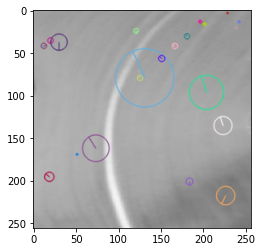

In [ ]:
j=1105
img=cv2.drawKeypoints(image_list[j],kp,image_list[j],flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imgplot = plt.imshow(img)
print(pathes[j])

In [ ]:
pip install opencv-python==4.4.0.40 opencv-contrib-python==4.4.0.40

     |████████████████████████████████| 49.4MB 87kB/s 
     |████████████████████████████████| 55.6MB 76kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
